# Тестовое задание на позицию суперлида-аналитика
# Анализ data.tsv

In [47]:
import pandas as pd

column_names = ['request', 'time', 'type']
df = pd.read_csv("data.tsv", sep="\t", names=column_names)

df['time'] = pd.to_datetime(df['time'], unit='s')
df.head(20)


,request,time,type
0,порно фото,2021-09-16 10:04:57,touch
1,малевич картины,2021-09-16 15:34:25,desktop
2,Секс,2021-09-16 08:39:43,touch
3,с днём рождения лена,2021-09-16 05:52:43,touch
4,зверополис порно,2021-09-16 10:19:59,touch
5,алабай собака фото,2021-09-16 10:04:05,touch
6,бактериофаг,2021-09-16 18:16:42,desktop
7,полина гагарина,2021-09-16 14:53:25,touch
8,кадр из фильма,2021-09-16 05:40:37,desktop
9,porno,2021-09-16 08:25:41,touch


## Предобработка данных

На этапе подготовки:
- Заданы имена колонок вручную, так как они отсутствовали в файле.
- Дата и время представлены в формате UNIX timestamp и были преобразованы в datetime с помощью `pd.to_datetime(..., unit='s')`.

In [13]:
print(min(df['time']))
print(max(df['time']))

2021-08-31 21:00:00
2021-09-21 20:59:59


## Диапазон дат

- Вывод даты и времени первого и последнего запроса, записанного в файле

In [15]:
df['request_lower'] = df['request'].str.lower()
mask = df['request_lower'].str.contains("ютуб", na=False)
df_youtube = df[mask]
df_youtube['type'].value_counts()


type
desktop    806
touch      732
Name: count, dtype: int64

## Количество запросов
- Приведение всех запросов в нижний регистр
- Сбор всех запросов, содержащих слово "ютуб"
- Сортировка по платформе и вывод

In [22]:
top_requests_desk = df[df['type'] == 'desktop']['request_lower'].value_counts().head(10)
top_requests_tch = df[df['type'] == 'touch']['request_lower'].value_counts().head(10)

print("Desktop:")
print(top_requests_desk)
print("\n\nTouch:")
print(top_requests_tch)

Desktop:
request_lower
календарь 2021                     2810
таблица менделеева                 2659
картинки                           1720
порно                              1408
английский алфавит                 1352
обои на рабочий стол               1143
одноклассники (социальная сеть)    1116
секс                                947
алфавит                             923
таблица квадратов                   883
Name: count, dtype: int64


Touch:
request_lower
порно                      10076
секс                        8262
с днём рождения женщине     4924
хентай                      4194
с днём рождения             4123
с днём рождения мужчине     3669
с днем рождения             3315
xxx                         3249
xnxx                        2767
доброе утро                 2342
Name: count, dtype: int64


## Популярные запросы
- Вывод 10 самых популярных запросов на разных платформах

Как видно из данных, на Touch-платформах люди чаще обращаются с поиском эротического характера, в то время как Desktop больше нацелен на образование и работу.

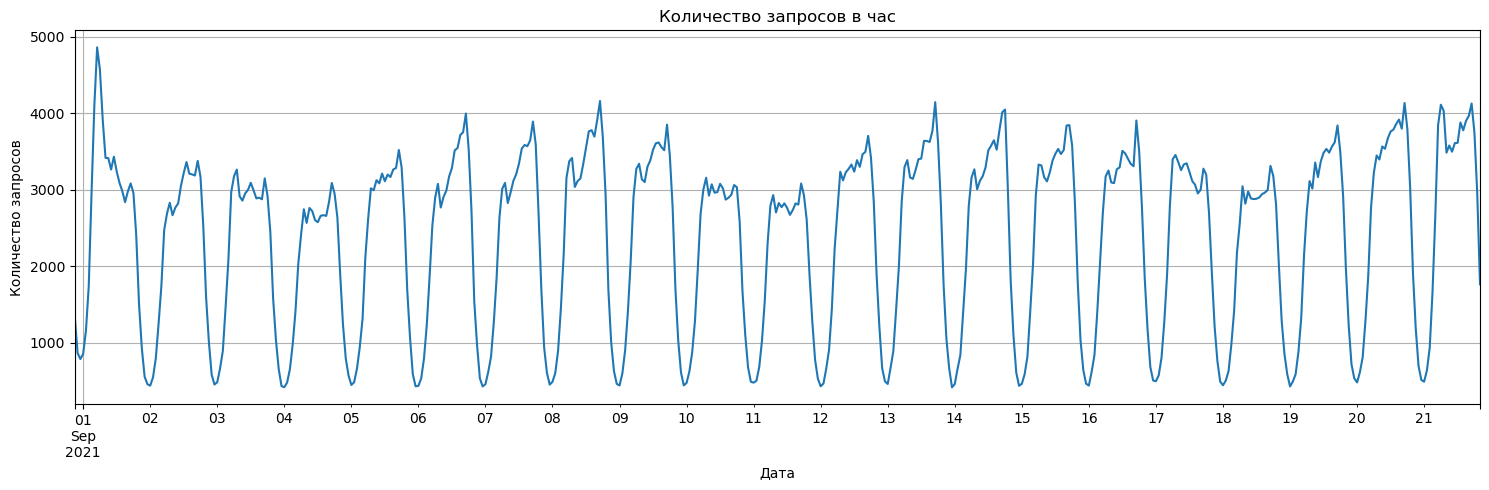

In [37]:
df['request_by_hour'] = df['time'].dt.floor('h')
count_of_request_by_hour = df.groupby('request_by_hour').size()

import matplotlib.pyplot as plot
plot.figure(figsize=(15, 5))
count_of_request_by_hour.plot()
plot.title("Количество запросов в час")
plot.xlabel("Дата")
plot.ylabel("Количество запросов")
plot.grid(True)
plot.tight_layout()
plot.show()

## Трафик запросов
- Время запроса округлено до часа в меньшую сторону
- Подсчет количества запросов в час
- Построение графика на основе данных

Как видно из графика, ночью люди меньше создают запросов, что логично. Также в течении дня, как правило, количество запросов растет, так как вечером многие люди пользуются интернетом. Также заметны просадки во время выходных (11-12, 18-19). 

In [44]:
top_requests_desk = df[df['type'] == 'desktop']['request_lower'].value_counts().head(15)
top_requests_tch = df[df['type'] == 'touch']['request_lower'].value_counts().head(15)

set_desktop = set(top_requests_desk.index)
set_tch = set(top_requests_tch.index)
only_desktop = set_desktop - set_tch
only_tch = set_tch - set_desktop
print("Уникальные запросы для Desktop:")
for query in only_desktop:
    print(query)
print("\n\nУникальные запросы для Touch:")
for query in only_tch:
    print(query)

Уникальные запросы для Desktop:
таблица квадратов
алфавит
обои на рабочий стол
английский алфавит
таблица умножения
карта мира
картинки
youtube
одноклассники (социальная сеть)
календарь на 2022 год с праздниками и выходными


Уникальные запросы для Touch:
sex
xnxx
porno
с днем рождения
hentai
xxx
с днём рождения мужчине
доброе утро
с днём рождения
с днём рождения женщине


## Уникальные запросы
- Получение 15 самых популярных запросов на разных площадках
- Вывод неповторяющихся запросов на двух платформах